In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# All imported libraries are from different stages of the code.
# Some may not even be used in the final code
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing the training and testing data

train = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv")

In [3]:
train.head()

,content_id,title,content_type,genre,sub_genre,release_year,language,country_of_origin,content_age_rating,budget,...,completion_rate,total_views,avg_watch_time,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost,user_retention
0,645543,The Surreal Conspiracy,Documentary,Drama,Historical,2013,Spanish,USA,PG,6.744258e+06,...,85.792005,8067.786265,20.718243,2835.071735,7,87.991891,110.000000,2.281850e+06,1481.325232,4.910349e+19
1,939316,Astro Saga in the Cosmos,Documentary,Drama,Crime,2023,Japanese,USA,PG,6.178134e+06,...,80.437724,750.473993,24.262058,655.016451,4,91.867209,85.750069,1.601333e+06,195.900521,NaN
2,280014,Synthesizing the Eternal Artifact,Movie,Action,Satire,2000,Japanese,USA,PG,1.588919e+07,...,82.882434,77701.229657,10.776592,19516.690216,3,66.761330,90.000000,5.274652e+06,15457.226653,4.901917e+23
3,215181,The Artifact of Savage Zenith,Movie,Romance,Satire,2019,English,UK,G,NaN,...,80.022574,4411.172846,11.376984,2701.183619,4,58.300367,113.564852,1.815005e+07,921.621615,1.672483e+15
4,241683,Resonating the Spectral Prophecy,Movie,Drama,Historical,1993,Spanish,USA,PG-13,1.518643e+07,...,72.209335,11678.765250,6.219910,16938.114373,1,47.234645,64.426039,4.809484e+06,15134.227463,2.539603e+08


## Task 1

### Data Exploration and Preparation

As a data analyst, you've received a new dataset for your upcoming project. Before diving into the main analysis, it's essential to ensure the data is ready for accurate and reliable results. Your task is to explore the dataset thoroughly, looking for any potential issues that could affect your findings.

Assess the completeness and consistency of the dataset. If you think the data is incomplete/inconsistent, why do you think so? Justify your answer. Identify any values or patterns that seem unusual or unexpected. Use an appropriate visualization method to highlight these anomalies visually.

Your goal is to prepare the dataset so you can confidently proceed with your analysis. Based on your visualizations, identify any concerns and develop strategies to address them.

Remember, the quality of your final results depends on the reliability of your input data. Take the time to thoroughly prepare and visualize your dataset, ensuring your conclusions will be as accurate and trustworthy as possible.

This data exploration and preparation stage is crucial before proceeding with any further analysis. The insights you gain and the cleaning processes you implement here will significantly impact the validity of your subsequent findings. Ensure your work in this stage is thorough and well-documented, as it forms the foundation for all your future analytical efforts. Once you're confident in the quality and integrity of your prepared dataset, you'll be well-positioned to move forward with further analysis.

In [4]:
print(train.info(), end='\n\n')
temp=train.drop_duplicates()
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             800000 non-null  int64  
 1   title                  800000 non-null  object 
 2   content_type           800000 non-null  object 
 3   genre                  800000 non-null  object 
 4   sub_genre              800000 non-null  object 
 5   release_year           800000 non-null  int64  
 6   language               800000 non-null  object 
 7   country_of_origin      800000 non-null  object 
 8   content_age_rating     800000 non-null  object 
 9   budget                 759925 non-null  float64
 10  runtime                800000 non-null  float64
 11  imdb_rating            760066 non-null  float64
 12  streamly_rating        800000 non-null  float64
 13  completion_rate        800000 non-null  float64
 14  total_views            800000 non-nu

- **We can observe above that there are no duplicates in the dataset, which would have increased bias otherwise.**
- **We can also observe that a couple of columns have NA values. Namely, the budget, imdb_rating, revenue, critic_score, user_engagement_score, and the user_retention data**

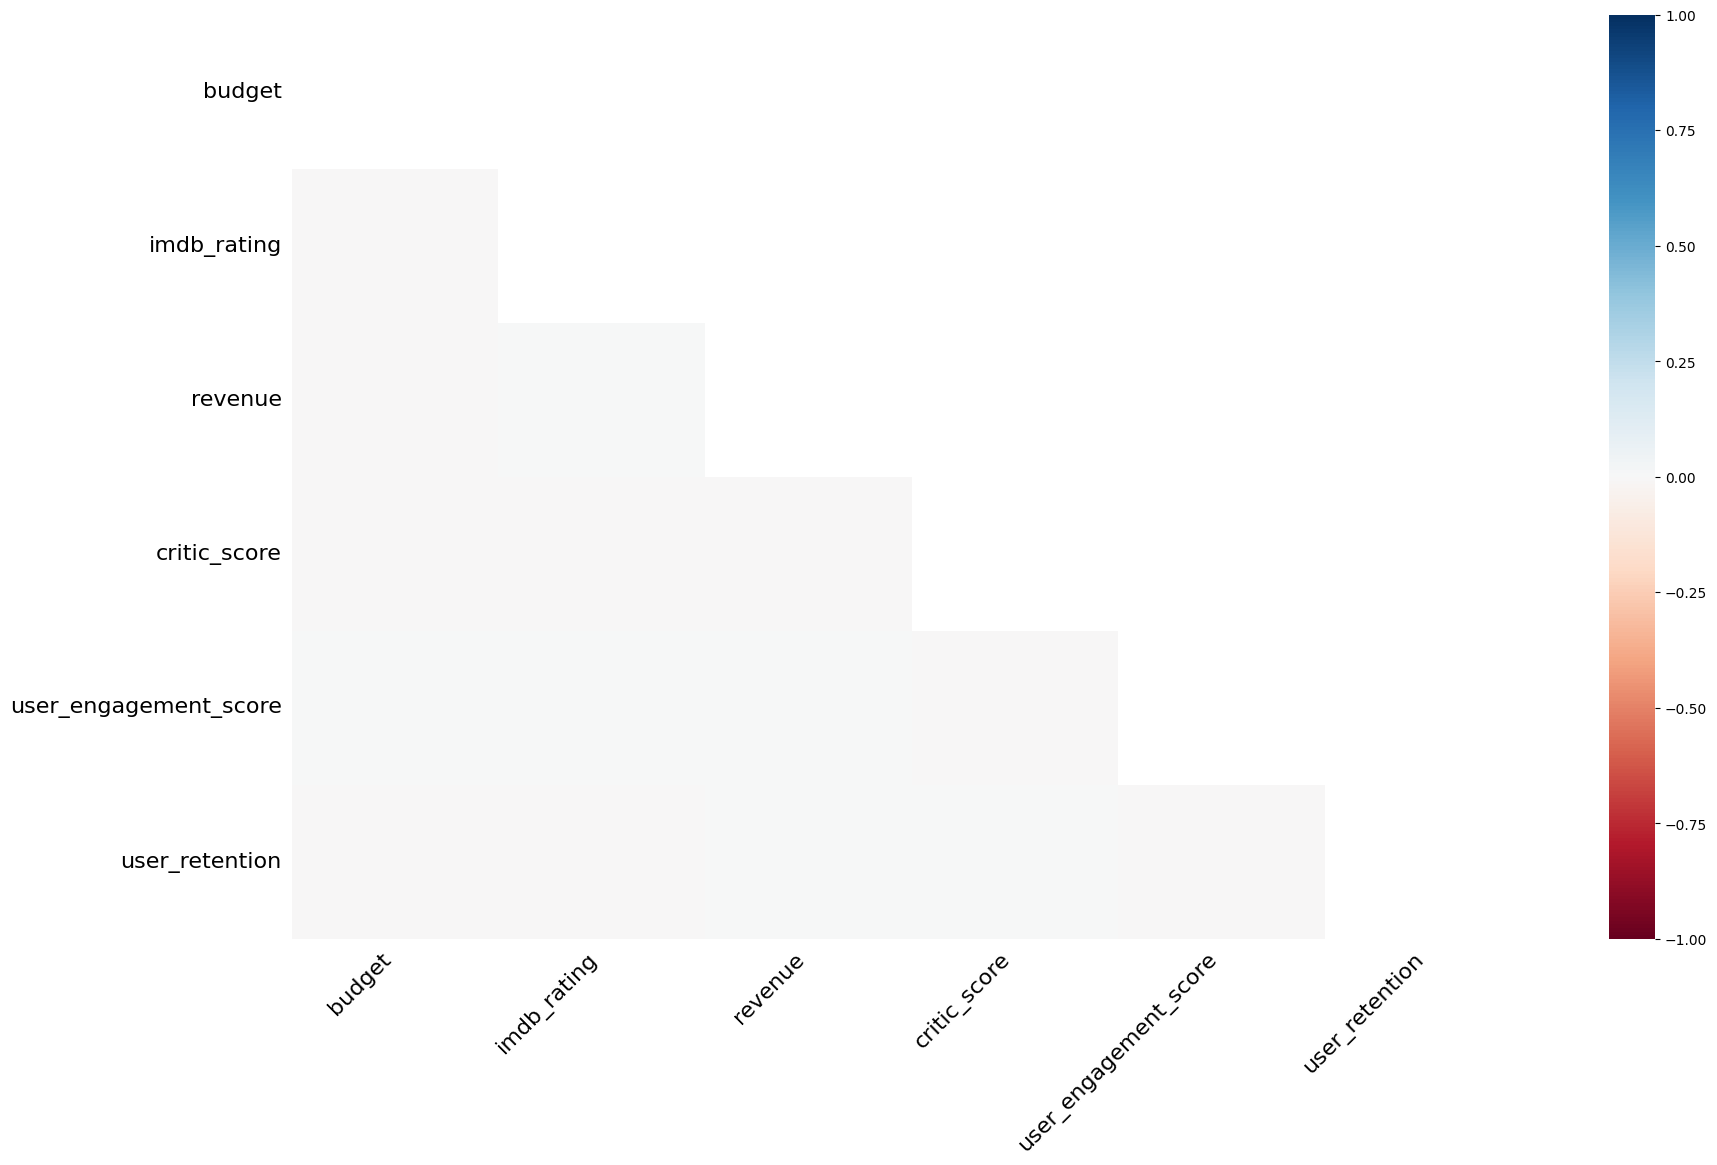

In [5]:
msno.heatmap(train)
plt.show()

#### **From this we can observe that there do not seem to be any correlations between any missing values. Cleaning of the dataset further would involve conventional methods of replacing by mean, median, 0 or entirely dropping the row**

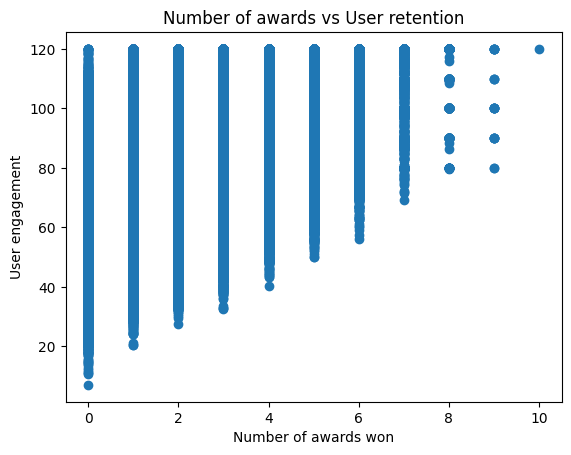

In [6]:
plt.scatter(train['awards'],train['user_engagement_score'])
plt.gca().update(dict(title='Number of awards vs User retention', xlabel='Number of awards won', ylabel='User engagement'))
plt.show()

#### **We can observe a clear correlation between the number of awards won and the lowest user engagement in a movie/series. Whats interesting is that movies(/series) of all number of awards have received high user engagement. This shows that while awards may increase user retention, it is definitely not a major factor.**

In [7]:
#Cleaining of data
train.fillna({'imdb_rating':train['imdb_rating'].median()}, inplace=True)
train.fillna({'revenue':train['revenue'].median()}, inplace=True)
train.fillna({'budget':train['budget'].median()}, inplace=True)
train.fillna({'critic_score':train['critic_score'].mean()}, inplace=True)
train.fillna({'user_engagement_score':train['user_engagement_score'].mean()}, inplace=True)
train.dropna(subset=['user_retention'], inplace=True)


In [8]:
#An anolmoly observed was that avg_watch_time was 0 but user_retention was above zero. 
#This doesnt even make sense. Hence classified as an anolomy. So those rows are removed below
train=train[~((train['avg_watch_time'] == 0) & (train['user_retention'] != 0))]
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543872 entries, 0 to 799999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             543872 non-null  int64  
 1   title                  543872 non-null  object 
 2   content_type           543872 non-null  object 
 3   genre                  543872 non-null  object 
 4   sub_genre              543872 non-null  object 
 5   release_year           543872 non-null  int64  
 6   language               543872 non-null  object 
 7   country_of_origin      543872 non-null  object 
 8   content_age_rating     543872 non-null  object 
 9   budget                 543872 non-null  float64
 10  runtime                543872 non-null  float64
 11  imdb_rating            543872 non-null  float64
 12  streamly_rating        543872 non-null  float64
 13  completion_rate        543872 non-null  float64
 14  total_views            543872 non-null  f


# Task 2

## Comprehensive Movie Performance Analysis (1 mark)

Streamly's content team is seeking to gain a deeper understanding of the factors that contribute to a movie's success on their platform. Your task is to:

1. Conduct a thorough exploration of the relationships between all relevant variables in the dataset.

2. Investigate the concept of Return on Investment (ROI) across different movie genres. While ROI = movie_revenue / movie_budget is a starting point, develop at least one additional metric that provides some interesting insights into the success of movies. Explain the implications of both ROI and your new metric. What makes a movie successful?

3. Utilize appropriate visualization techniques to represent your findings.

As you analyze the data:

* What overall trends or anomalies do you notice when examining the relationships between different variables?
* Are there any unexpected correlations between factors that might not seem obviously related at first glance?
* Are there any surprising or counter-intuitive findings that challenge common assumptions about what makes a movie successful?

***Hint: Consider creating a correlogram to visualize the relationships between all numerical variables in the dataset. This can help you identify interesting patterns or connections that might not be immediately apparent.***

Your insights will help guide Streamly's content acquisition and promotion strategies, so be sure to clearly articulate any patterns or conclusions you derive from the data.

After completing your analysis, take a step back and reflect on the bigger picture. You have uncovered different relationships between various aspects of movies and their performance.

Remember, the goal is to provide actionable insights that can inform data-driven decision-making at Streamly.

In [9]:
#1.Conduct a thorough exploration of the relationships between all relevant variables in the dataset.
# Relevant variables include awards, language, budget, runtime, imdb_rating, completion_rate, revenue, critic_score, and user_engagement_score
train['language_in_nums'] = train['language'].astype('category').cat.codes
print("Correlation between language and revenue is: ",train['language_in_nums'].corr(train['revenue']))

print("Correlation between imdb rating and critic score is: ",train['critic_score'].corr(train['imdb_rating']))

print("Correlation between imdb rating and streamly rating is: ",train['streamly_rating'].corr(train['imdb_rating']))

print("Correlation between budget and revenue is: ",train['revenue'].corr(train['budget']))

print("Correlation between user engagement and number of awards is: ",train['awards'].corr(train['user_engagement_score']))

print("Correlation between user engagement and runtime is: ",train['runtime'].corr(train['user_engagement_score']))

print("Correlation between imdb_ratings and number of awards is: ",train['imdb_rating'].corr(train['awards']))

print("Correlation between user engagement and completion rate is: ",train['completion_rate'].corr(train['user_engagement_score']))

print("Correlation between Licensing costs and total viewership is: ",train['total_views'].corr(train['licensing_cost']))

Correlation between language and revenue is:  0.0003188060952196618
Correlation between imdb rating and critic score is:  0.6292358312137062
Correlation between imdb rating and streamly rating is:  0.9350064656903078
Correlation between budget and revenue is:  0.2999037912543857
Correlation between user engagement and number of awards is:  0.5830614126893571
Correlation between user engagement and runtime is:  -0.508740878991714
Correlation between imdb_ratings and number of awards is:  0.6872831182976273
Correlation between user engagement and completion rate is:  0.7168542774937336
Correlation between Licensing costs and total viewership is:  0.7915566212421935


###  By this, we can observe that some of the highest correlated variables are imdb ratings, number of awards, and user engagement scores. 
### It is best to improve number of shows/movies having high imdb_ratings, which have secured large number of awards, which have high user engagement and which have low runtime. These factors will improve user retention if followed.

### *Are there any surprising or counter-intuitive findings that challenge common assumptions about what makes a movie successful?*
### **A common assumption would have been that budget and revenue would have been more correlated. It was surprising to see only 30% correlation (was expecting more than 50%)**

#### The new metric we decided on is called Cost per Individual View(CIV).  
#### CIV=licensing_cost/total_views.  
#### CIV helps streamly to understand which series/movies provide better rate of returns on investments.  
#### The **lower the CIV, the better** it is for streamly.  
#### We personally felt that CIV performs a better job than ROI because ROI cannot look at the smaller investments that give a proportionally bigger viewership (which over 10 series would be the same as a bigger show but the bigger show would have costed 20x more to license).  
#### ROI only displays the biggest profits in its theatrical/streaming release. **Whereas, CIV gives better returns to streamly.**

### A movie is successful for a studio if ROI is good. But for streamly, a movie can be considered good if the CIV is good

In [10]:
train['retention_modified']=np.where(train['user_retention']>0, np.emath.logn(np.e,train['user_retention']),0)
temp_for_corr=train[['awards', 'budget', 'runtime', 'imdb_rating', 'completion_rate', 'revenue','total_views', 'critic_score','user_engagement_score', 'licensing_cost', 'marketing_spend', 'retention_modified']]
print(temp_for_corr.corr())

/opt/conda/lib/python3.10/site-packages/numpy/lib/scimath.py:386: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)/nx.log(n)


                         awards    budget   runtime  imdb_rating  \
awards                 1.000000  0.132042 -0.336965     0.687283   
budget                 0.132042  1.000000 -0.008862     0.041281   
runtime               -0.336965 -0.008862  1.000000    -0.221734   
imdb_rating            0.687283  0.041281 -0.221734     1.000000   
completion_rate        0.616094  0.028477 -0.846201     0.674402   
revenue                0.155390  0.299904 -0.073858     0.173950   
total_views            0.262574  0.115895 -0.087638     0.336343   
critic_score           0.491153  0.073797 -0.267940     0.629236   
user_engagement_score  0.583061  0.057046 -0.508741     0.614194   
licensing_cost         0.231923  0.099812 -0.113776     0.263443   
marketing_spend        0.264864  0.646178 -0.045244     0.171507   
retention_modified     0.514801  0.039847 -0.612349     0.535163   

                       completion_rate   revenue  total_views  critic_score  \
awards                        0.6160

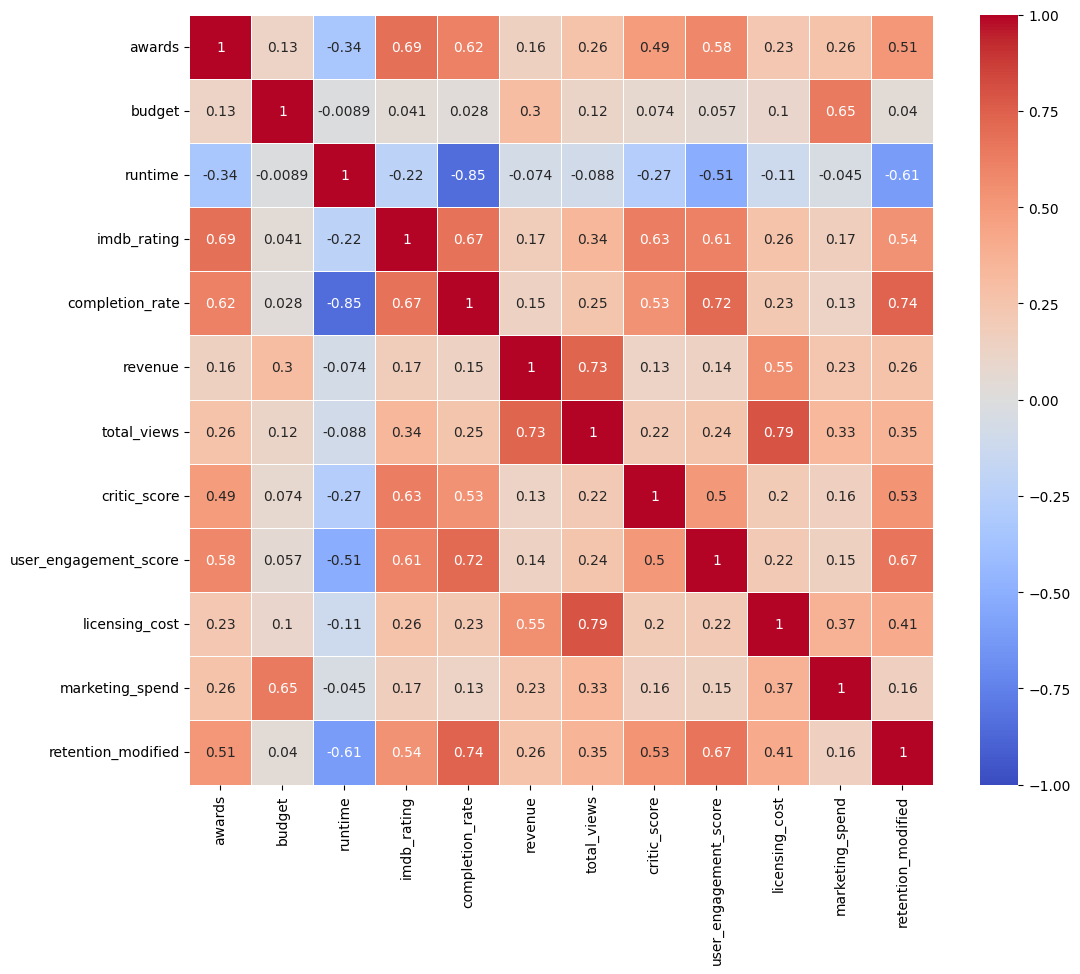

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(temp_for_corr.corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.show()

# Task 3 

## Correlation analysis (0.5 marks)

Streamly's data science team is focused on optimizing content strategy, particularly around enhancing user retention.

Based on your correlation analysis, suggest strategies Streamly could adopt to improve user retention. Are there any patterns or relationships that seem peculiar?

Reflect on whether making certain adjustments to the variables could provide a clearer understanding of their impact on user retention. What would be your rationale for making these adjustments?

Plot another correlation matrix after you have made the adjustment(s). Based on the correlation plot you have just made, how can you increase user retention?

As observed above, runtime must be reduced, and factors like number of awards and imdb_rating must be focused on when selecting a movie/series.

## Strategies to adopt:  


### As mentioned above, some of the highest correlated variables are imdb ratings, number of awards, and runtimes.  
### It is best to improve number of shows/movies having high imdb_ratings, which have secured large number of awards, and which have low runtime. These factors will improve user retention if followed.

> **Some of the variables below are out of Streamly's control when they lease a movie. Regardless, some strategies to improve user retention:**
> **Focus on High Engagement Content: Since user_engagement_score and retention_modified (user retention) have a strong correlation of 0.6, increasing user engagement could directly impact retention. Develop and promote content that has higher engagement scores.**
> 
> **Increase Completion Rates: With user_engagement_score and completion_rate having a correlation of 0.71, improving content quality and relevance to encourage users to complete watching can boost engagement and retention.**
> 
> **Leverage High-Rated Content: Content with higher imdb_rating tends to correlate well with user_engagement_score and retention_modified. Prioritize content with high ratings to attract and retain users.**
> 
> **Promote Award-Winning Content: Given the correlation of 0.68 between imdb_rating and awards, highlighting content that has won awards or received nominations could be an effective strategy to improve retention.**
> 
> **Integrate Positive Critic Feedback: With imdb_rating and critic_score showing a correlation of 0.63, incorporating content with favorable critic reviews can enhance user satisfaction and retention.**
> 
> **Reflection on Adjustments**
> **Focus on Engagement Metrics: Adjust the weight or importance given to user engagement metrics and completion rates in your content strategy. By analyzing content types and genres that drive higher engagement and completion rates, you can tailor recommendations and content strategies to retain users better.**
> 
> **Consider Content Diversity: Explore whether different genres or types of content with high engagement scores and ratings also lead to different retention patterns. This could provide more nuanced insights into which types of content are more likely to retain users.**

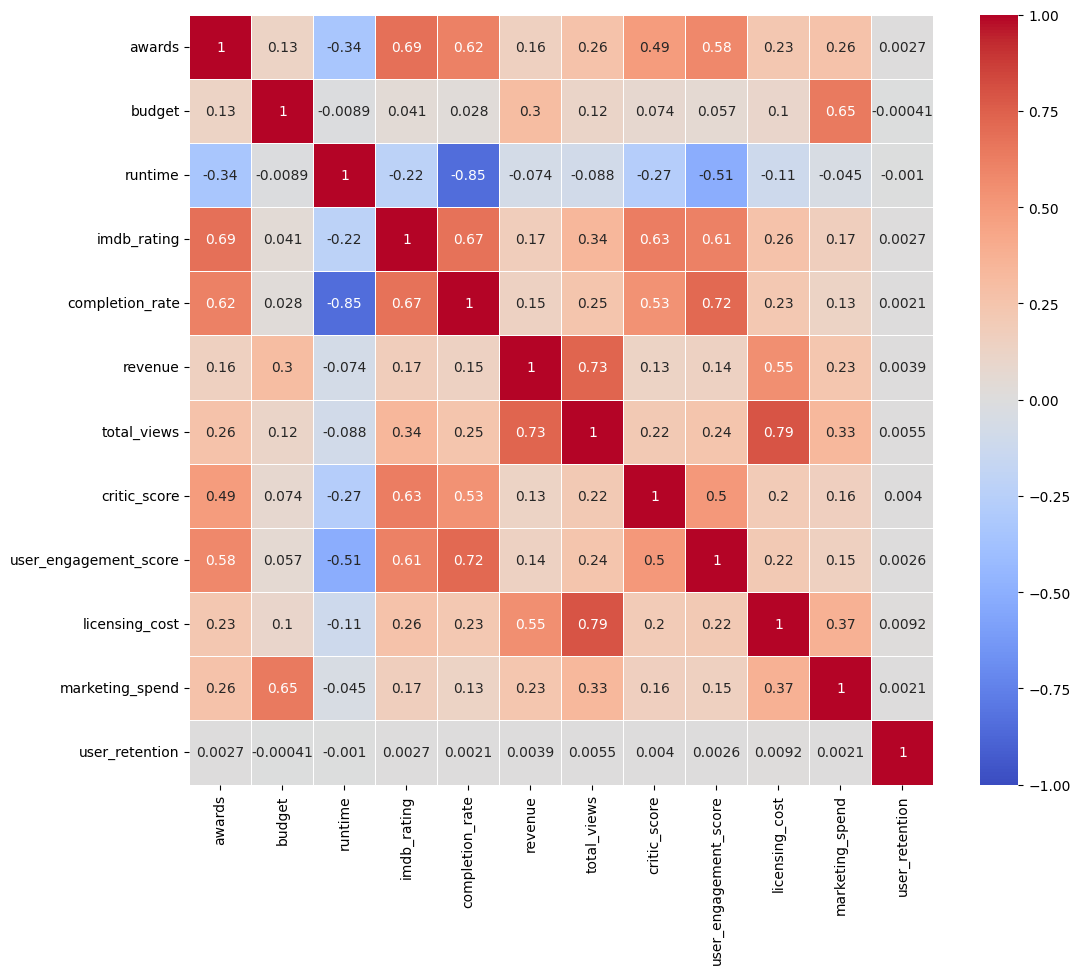

In [12]:
#Considering adjusting user retention for better understanding
#First consider original user retention
temp_for_corr2=train[['awards', 'budget', 'runtime', 'imdb_rating', 'completion_rate', 'revenue','total_views', 'critic_score','user_engagement_score', 'licensing_cost', 'marketing_spend', 'user_retention']]
plt.figure(figsize=(12, 10))
sns.heatmap(temp_for_corr2.corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.show()

- #### We can observe that the correlations between user retention and other categories is not much. 
- #### This would imply that none of the categories affect user retention, which doesn't make sense. 
- #### Hence, we try to adjust user retention to get a better correlation.

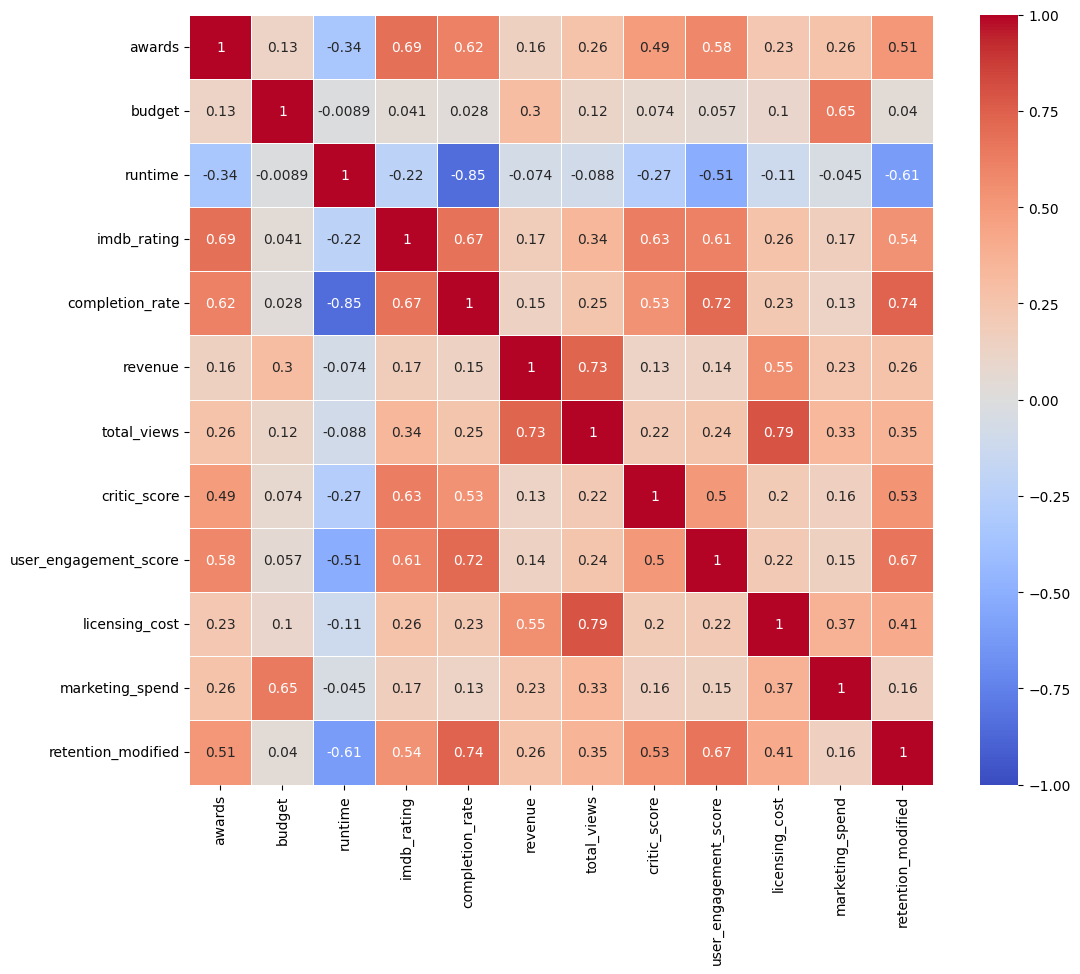

In [13]:
#Now considering heatmap after adjusting user retention to be within 0-100
#Defined above- train['retention_modified']=np.where(train['user_retention']>0, np.log10(train['user_retention']),0)
temp_for_corr=train[['awards', 'budget', 'runtime', 'imdb_rating', 'completion_rate', 'revenue','total_views', 'critic_score','user_engagement_score', 'licensing_cost', 'marketing_spend', 'retention_modified']]
plt.figure(figsize=(12, 10))
sns.heatmap(temp_for_corr.corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.show()

# Task 4

## User Retention Analysis and Modeling (1 mark)

Streamly's ultimate goal is to develop a model that predicts user retention for movies. You need to:

Develop a model to predict user retention based on content characteristics and performance metrics.
Analyze how each feature used in the model affects user retention and explain your reasoning.


You must have already studied measures like Mallows' Cp in class that are used for feature selection in multiple linear regression (MLR) models. Explore additional metrics similar to Mallows' Cp and discuss their usefulness in different scenarios. **(You don't have to write code for this)**

By analyzing how each feature affects user retention, you can gain valuable insights into the factors that drive or hinder viewer engagement with content on Streamly. Understanding the impact of these features allows you to refine your model for better accuracy, enabling Streamly to make data-driven decisions in content strategy.

In [14]:
# Separate the features and target variable
X = train.drop(columns=['user_retention', 'retention_modified', 'title', 'content_id'])  # Drop non-predictive columns
y = train['retention_modified']  # Predicting the actual user retention

# Define preprocessing for categorical and numeric features
numeric_features = ['budget', 'runtime', 'imdb_rating', 'streamly_rating', 'completion_rate', 'total_views', 
                    'avg_watch_time', 'revenue', 'awards', 'critic_score', 'user_engagement_score', 'marketing_spend', 'licensing_cost']
categorical_features = ['content_type', 'genre', 'sub_genre', 'language', 'country_of_origin', 'content_age_rating']

# Preprocessing pipeline: scale numeric features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the regression model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model on the training data
model.fit(X, y)

# Predict user retention on test data
X_test = test.drop(columns=['title', 'content_id'])  # Use test data without non-predictive columns
test['user_retention'] = model.predict(X_test)


#### Explore additional metrics similar to Mallows' Cp and discuss their usefulness in different scenarios

> Mallows's Cp is used to select the best regression model by incorporating the right number of explanatory variables in the model. The best regression model is the model with the number of parameters closest to the Cp value.
> 
> Amongst the several models similar to Mallows's Cp, the following are prominent:
> 
> 1.Akaike Information Criterion (AIC): AIC(M)= −2logL(M)+2k, where L(M) is the likelihood corresponding to the model M and k is the number of parameters. Lower the AIC value, better the model. AIC is useful for comparing models which you suspect of overfitting and want to remove any unnecessary parameters.
> 
> 2.Bayesian Information Criterion (BIC): BIC(M)= -2logL(M)+2log(N), where N is the size of training data. This metric measures the trade-off between model fit and complexity of the model. Similar to AIC, lower BIC means better the model. BIC is useful when the user feels one model is better than the other and to test on large sample datasets.
> 
> 3.Adjusted R-Square: This metric is similar to R-Square but compensates for the number of independent variables in the model , a high Adjusted R-Square value means a better model. It is useful for large datasets and to prevent overfitting in models, and accounts for the complexity and fit of the model.
> 
> 4.Likelihood Ratio Test (LRT): -2log(L(m1)/L(m2)). This metric is used for nested distribution models, where it evaluates the addition of parameters to significantly improve the model's fit. The LRT is compared with the chi-square test distribution to check whether the more complex model offers a better fit. LRT is useful in nested structure models which use hierarchical, structural or logistic regression modelling.

# Task 5 
## Model Evaluation (0.5 marks)

To ensure the reliability of the regression model, you need to:
Select appropriate evaluation metrics to assess the model's performance.
Calculate and interpret the chosen evaluation metrics.

Do you think this evaluation metric is appropriate for this problem? Does this give us a complete picture of the solution? If not, is there any other metric that can provide us a more complete picture?

The model evaluation will give Streamly confidence in the model's predictions and guide them in refining the model for better performance.

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Ensure all categorical variables are converted to numeric (e.g., one-hot encoding for categorical variables)
X_with_const = sm.add_constant(X)

# Convert categorical columns to dummy variables (if there are any)
X_with_const = pd.get_dummies(X_with_const, drop_first=True)

# Convert boolean columns to integers
X_with_const = X_with_const.astype({col: 'int64' for col in X_with_const.select_dtypes(include=['bool']).columns})

# Fit the OLS model
ols_model = sm.OLS(y, X_with_const).fit()

# R² and Adjusted R²
r_squared = ols_model.rsquared
adj_r_squared = ols_model.rsquared_adj

# Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)
aic = ols_model.aic
bic = ols_model.bic

# Log-Likelihood
log_likelihood = ols_model.llf

# Print key model metrics
print(f"R²: {r_squared}")
print(f"Adjusted R²: {adj_r_squared}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"Log-Likelihood: {log_likelihood}")


R²: 0.8808628323639502
Adjusted R²: 0.8808540695558252
AIC: 3422291.3300219467
BIC: 3422750.7952593123
Log-Likelihood: -1711104.6650109733


#### R-Square and Adjusted R-Square are a better metric after Mallows's Cp as they provide a good indication on how the model works in terms of variability of dependent variables. Both metrics help in understanding the models explanatory power and provide a quality-fit without overfitting for the dataset.

In [16]:
submission = pd.DataFrame()
submission["title"] = test["title"]

In [17]:
sample_submission = pd.read_csv('/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/sample_submission.csv')

In [18]:
submission["user_retention"] = test["user_retention"]

In [19]:
submission.head(10)

,title,user_retention
0,Pulsating the Eternal Tale (AG4P),36.825127
1,Arcane Legend: A Spy Tale (NFVT),43.670189
2,The Neon Grimoire (9RHA),39.637280
3,Pulsating through the Dreamscape: The Mega Mirage,22.817883
4,The Turbo Enigma (D23S),36.881432
5,Exploring the Nebula Legacy (ORDF),26.625156
6,Manifesting in the Multiverse: The Psychedelic...,29.698326
7,Unraveling in the Cybersphere: The Opulent Chr...,40.720299
8,The Phenomenon of Mythic Oasis,23.865108
9,Pulsating beyond the Event Horizon: The Whimsi...,22.953480


In [20]:
submission.to_csv('submission.csv', index = False)

## Congratulations! 🎉

You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-1 assignment. This is a significant achievement that demonstrates your growing skills in data modeling and analysis.

### What you've accomplished:
- Applied data analytics concepts to a real-world scenario
- Developed regression models

### What's next:
You're now equipped with the foundational skills needed for real-world data modeling and regression analysis. The techniques you've learned here are directly applicable to many data science and machine learning projects in various industries.

Remember, this is just the beginning of your data science journey. Keep exploring, keep learning, and don't hesitate to take on more challenging projects!

**Congratulations once again, and best of luck for your next assignment!** 